# Variables and Arrays

Initliazing arrays is simple and can be done using the following commands, for example:

In [ ]:
v1 = [1,2,3,4]
v2 = [4,2,7,4]
v3 = [v1,v2]

In [2]:
%pylab inline
z1 = zeros(2)
o1 = ones((2,2))

Populating the interactive namespace from numpy and matplotlib


The very first line calls the ipython magic command %pylab, which initializes the environment with commands from numpy and matplotlib. Note that this can only work in an ipython shell or notebook. If you are writing a script, you will need to import numpy and matplotlib manually. 

In [2]:
v1 = [1,2,3,4]
v2 = [4,2,7,4]
v3 = [v1,v2]

(2, 4)

In [5]:
print(size(v3,0))
print(size(v3,1))

2
4


# Matrix operations

Many functions are provided to manipulate an array. Some useful ones are explained here. 

To flatten a multi-dimensional array into a single-dimensional vector, we use a combination of commands **flatten** and **list**.

In [7]:
v4 = list(flatten(v3))
v4

[1, 2, 3, 4, 4, 2, 7, 4]

The function **transpose** transposes v3, similar to MATLAB's transpose operator(single-quotation). This is shown below:

In [8]:
v5 = transpose(v3)
print(v5)

[[1 4]
 [2 2]
 [3 7]
 [4 4]]


The matrix multiplication and element-wise multiplication are performed using the commands **dot** and **multiply**, respectively.

In [9]:
v6 = dot(v3, v5)
v7 = multiply(v3, v3)
print(v6)
print(v7)

[[30 45]
 [45 85]]
[[ 1  4  9 16]
 [16  4 49 16]]


Please note that the summation operator "+" has a completely different meaning for arrays/matrices than for scala numbers. The output of the following line of code for example, is the concatenation of the two vectors v1 and v2, rather than their element-wise summation one my guess

In [10]:
v1 + v2

[1, 2, 3, 4, 4, 2, 7, 4]

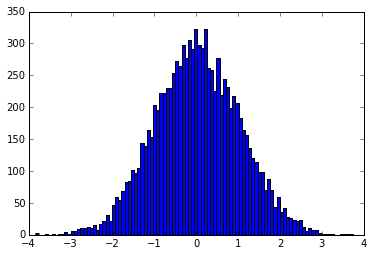

In [3]:
x = randn(10000);
hist(x,100);

# Signal Representation


## Basic signals

### Impulse 

The discrete-time impulse (or discrete time _delta function_) is potentially the simplest discrete-time signal;

$$
\delta[n] = \left\{ \begin{array}{11}
1 & n = 0 \\
0 & n \not= 0
\end{array} \right.
$$

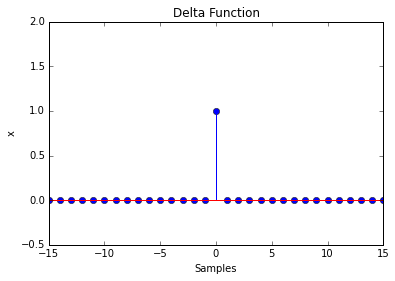

In [28]:
xdelta = linspace(-15, 15, 31)
delta_function = vectorize(lambda x: 1 if (x == 0) else 0)
stem(xdelta, delta_function(xdelta))
title('Delta Function')
ylim([-.5, 2])
xlabel('Samples')
ylabel('x')

### Unit Step

$$
u[n] = \left\{ \begin{array}{11}
1 & n \ge 0 \\
0 & n < 0
\end{array} \right.
$$

The unit step can be obtained via a discrete-time integration of the impulse

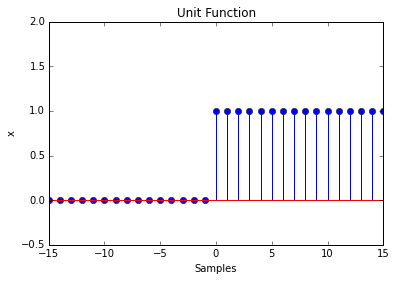

In [30]:
xunit = linspace(-15, 15, 31)
unit_function = vectorize(lambda x: 1 if (x >= 0) else 0)
stem(xunit, unit_function(xunit))
title('Unit Function')
ylim([-.5, 2])
xlabel('Samples')
ylabel('x')

### Exponential Decay

$$
x[n] = a^n u[n], \mbox{    } a \in \mathbb{C}, |a| < 1
$$

The exponential decay is the free response of a discrete-time first order recursive filter. Exponential sequences are well-behaved only for values of a less than one in magnitude; sequences in which $|a| > 1$ are unbounded and represent an unstable behavior (their energy and power are both infinite).

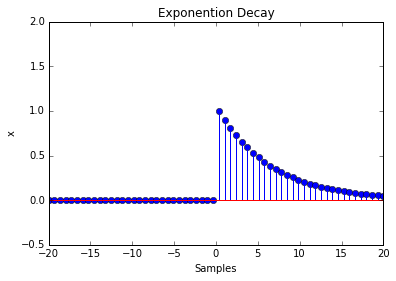

In [62]:
xexp = linspace(-20, 20, 60)
def exp_decay_function(a, xexp):
    u = unit_function(xexp)
    res = u[u <= 0]
    res = concatenate((res, 
                asarray([a**idx*val for idx, val in enumerate(u[u > 0])])))
    return res
stem(xexp, exp_decay_function(0.9, xexp))
title('Exponention Decay')
ylim([-.5, 2])
xlabel('Samples')
ylabel('x')

### Complex Exponential

$$
x[n] = e^{j(\omega_0n + \phi)}
$$

Special cases of the complex exponential are the real-valued discrete-time sinusoidal oscillations:

$$x[n] = sin(\omega_0n + \phi)$$
$$x[n] = cos(\omega_0n + \phi)$$

(-1.2, 1.2)

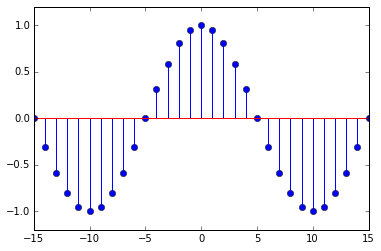

In [169]:
xsinu = linspace(-15, 15, 31)
ysinu = cos(pi/10*xsinu)
stem(xsinu, ysinu)
ylim([-1.2, 1.2])

## Elementary operators

**Shift**: A sequence $x[n]$, shifted by an integer $k$ is:
$$y[n] = x[n-k]$$

if $k$ is positive, the signal is shifted "to the right", meaning that the signal has been _delayed_; if $k$ is negative, the signal is shifted "to the left", meaning that the signal has been _advanced_

**Scaling**: A sequence $x[n]$ scaled by a factor $a \in \mathbb{C}$
$$y[n] = ax[n]$$

if $a$ is real, then the scaling represents a simple amplification or attenuation of the signal (when $a > 1$ and $a < 1$). If $a$ is complex, amplification and attenuation are compounded with a phase shift.

**Sum**: The sum of two sequences $x[n]$ and $w[n]$ is their term-by-term sum:

$$y[n] = x[n] + w[n]$$

**Product**: The product of two sequences $x[n]$ and $w[n]$ is their term-by-term product

$$y[n] = x[n]w[n]$$

**Integration**: The discrete-time equivalent of integration is expressed by the following running sum:

$$y[n] = \sum_{k=-\infty}^n x[k]$$

**Differentiation**: A discrete-time approximation to differentiation is the first-order difference

$$y[n] = x[n] - x[n-1]$$

## The Reproducing Formula

The signal reproducing formula is a simple application of the basic signal and signal properties that we have just seen and it states that

$$x[n] = \sum_{k=-\infty}^\infty x[k]\delta[n-k]$$

## Energy and Power

We define the _energy_ of a discrete-time signal as

$$E_x = ||x||_2^2 = \sum_{n=-\infty}^{\infty}|x[n]|^2$$

Obviously the energy is finite only if the above sum converges, i.e. if the sequence $x[n]$ is square-summable. 

We define the _power_ of a signal as the usual ratio of energy over time, taking the limit over the number of samples considered:

$$P_x = \lim_{N \rightarrow \infty}\frac{1}{2N}\sum_{-N}^{N-1}|x[n]|^2$$